<class 'numpy.ndarray'>
(768, 1024, 3)
[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 87 106  76]
  [ 94 110  81]
  [107 124  92]
  ...
  [120 158  97]
  [119 157  96]
  [119 158  95]]

 [[ 85 101  72]
  [ 95 111  82]
  [112 127  96]
  ...
  [121 157  96]
  [120 156  94]
  [120 156  94]]

 [[ 85 101  74]
  [ 97 113  84]
  [111 126  97]
  ...
  [120 156  95]
  [119 155  93]
  [118 154  92]]]
3


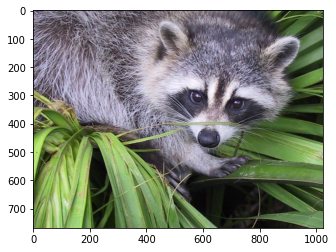

In [9]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

img = misc.face()
print(type(img))
print(img.shape)   # It indicates that we have an array of 3 matrices, each having shape 768*1024.print(img.ndim)
                   # each level represent the intensities of one row
print(img)                  
print(img.ndim)
plt.imshow(img)
plt.show()

[[121 138 153 ... 119 131 139]
 [ 89 110 130 ... 118 134 146]
 [ 73  94 115 ... 117 133 144]
 ...
 [ 87  94 107 ... 120 119 119]
 [ 85  95 112 ... 121 120 120]
 [ 85  97 111 ... 120 119 118]]


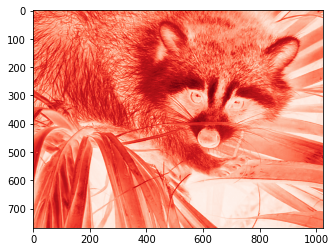

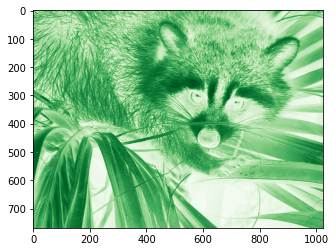

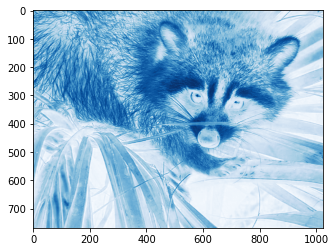

In [10]:
"""
    TODO: Assign each color channel to a separate matrix using the slice syntax.
"""
### START CODE HERE ###
red_channel = img[:,:,0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]
### END CODE HERE ### 
print(red_channel)
plt.imshow(red_channel, cmap='Reds')
plt.show()
plt.imshow(green_channel, cmap='Greens')
plt.show()
plt.imshow(blue_channel, cmap='Blues')
plt.show()

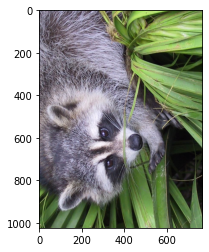

In [12]:
"""
    TODO: Now, try swapping the first and second axis of the image, 
    how are these images compared to the original images?
    Save to the variable ```transposed_images```.
"""
### START CODE HERE ### (≈ 1 line of code)
transposed_img = np.transpose(img,[1, 0, 2])
### END CODE HERE ###


plt.imshow(transposed_img)

(768, 1024)
[[116.857 133.857 149.085 ... 117.979 128.349 136.349]
 [ 86.145 107.145 126.786 ... 116.751 132.751 144.751]
 [ 70.145  91.145 112.145 ... 117.039 133.039 144.039]
 ...
 [ 96.899 101.91  115.269 ... 139.684 138.684 139.157]
 [ 92.91  102.91  118.981 ... 139.282 138.168 138.168]
 [ 93.138 104.91  118.209 ... 138.282 137.168 136.168]]


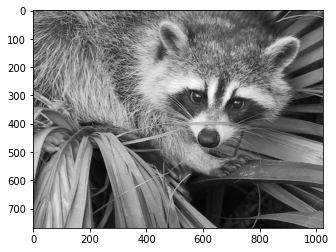

In [16]:
"""
    TODO: Compute the greyscaled version of the image to the variable ```grey_image```
"""
luminance = np.array([0.299, 0.587, 0.114]) # Luminance coefficients
### START CODE HERE ### (≈ 1 line of code. Hint: Try fiddle around by looking at the shape of the arrays. The result image might or might not have 3 channels)
grey_img = img@luminance
print(grey_img.shape)
print(grey_img)
### END CODE HERE ###
plt.imshow(grey_img, cmap='gray', vmin=0, vmax=255)

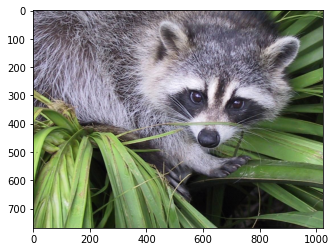

In [21]:
"""
    TODO: Compute the new image from the grey image to the variable ```new_image```
"""

alpha = 0.1
### START CODE HERE ### (≈ 1 line of code)
new_img = alpha*(np.reshape(grey_img,(768, 1024, 1))) + (1-alpha)*img
### END CODE HERE ###

plt.imshow(new_img.astype(np.uint8))

[0.         0.00394823 0.00789639 ... 0.97994462 0.97915022 0.97834055]
(10000,)
[0.         0.03946873 0.07885567 ... 0.80159602 0.80000513 0.79832029]
(10000,)
[0.         0.38139994 0.68808097 ... 0.78732097 0.78794461 0.78706098]
(10000,)
[0.         0.78061251 0.81686829 ... 0.78523915 0.78520545 0.78557383]
(10000,)


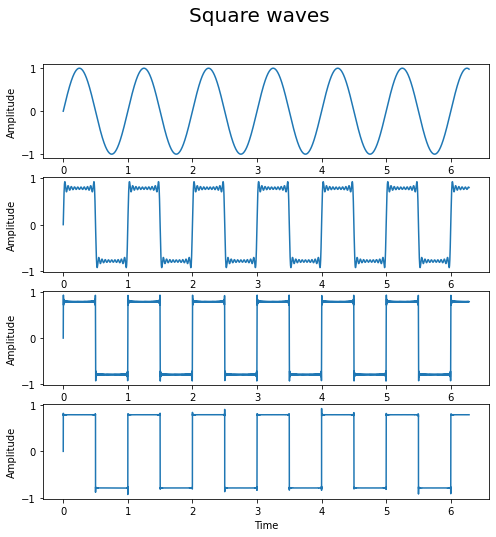

In [28]:
import numpy as np
import matplotlib.pyplot as plt

"""
    Demonstration of Fourier Decomposition of Square Waves
    Referenced from: https://en.wikipedia.org/wiki/Square_wave
"""

t = np.linspace(0, np.pi * 2, 10000) # Create array with 10,000 values ranging from 0 to 2*pi

fig, axs = plt.subplots(4, 1, figsize=(8,8)) # Create plot with 4 rows and 1 column. Is that really needed for plotting 1 simple exponential curve?
fig.suptitle('Square waves', fontsize=20) # Naming the figure for the fancy presentation.

for i in range(4):
    stack_of_functions = [((2 * k + 1)**-1) * np.sin(2 * np.pi * t * (2 * k + 1)) for k in range(10 ** i)] # Fourier decomposition of square waves
    stack_of_functions = np.vstack(stack_of_functions) # Turn array of 1d ndarray to 2d ndarray.

    square_wave = stack_of_functions.sum(axis=0) # Sum all sine waves
    print(square_wave)
    print(square_wave.shape)
    axs[i].set(xlabel='Time', ylabel='Amplitude') # Fancy axis labeling
    axs[i].plot(t, square_wave) # Plot the graphs

fig.show() # In normal python program (i.e. not using notebook but running normal python program), you need to run this line in order to show what you have plot

[1.0, 1.000628578841788, 1.001257552794936, 1.001886922107803, 1.002516687028904, 1.0031468478069097, 1.0037774046906471, 1.0044083579291003, 1.0050397077714095, 1.0056714544668712, 1.0063035982649389, 1.0069361394152232, 1.007569078167491, 1.0082024147716668, 1.0088361494778317, 1.0094702825362243, 1.01010481419724, 1.0107397447114324, 1.011375074329512, 1.0120108033023472, 1.0126469318809637, 1.0132834603165455, 1.013920388860434, 1.014557717764129, 1.015195447279288, 1.015833577657727, 1.0164721091514202, 1.0171110420125002, 1.017750376493258, 1.0183901128461432, 1.0190302513237643, 1.0196707921788881, 1.0203117356644409, 1.0209530820335073, 1.0215948315393315, 1.022236984435317, 1.022879540975026, 1.0235225014121805, 1.024165866000662, 1.0248096349945113, 1.025453808647929, 1.026098387215276, 1.026743370951072, 1.0273887601099978, 1.0280345549468934, 1.0286807557167599, 1.0293273626747577, 1.0299743760762083, 1.0306217961765936, 1.0312696232315555, 1.0319178574968972, 1.03256649922

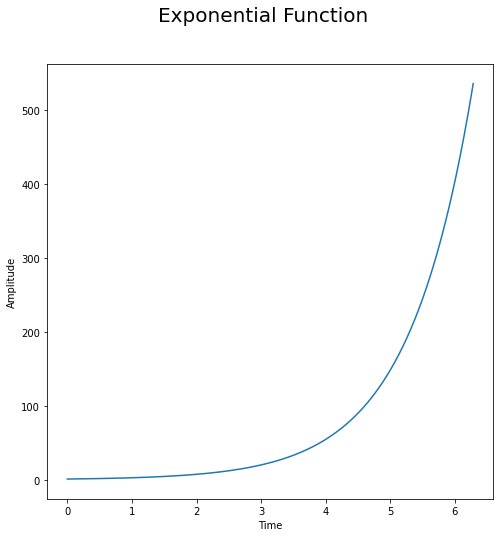

In [36]:
### START OF YOUR CODE ###
# GOAL: Plot any exponential curve #
import math

t = np.linspace(0, 2*np.pi, 10000)

fig, axs = plt.subplots(1, 1, figsize=(8,8)) 
fig.suptitle('Exponential Function', fontsize=20)
values = [np.e, x) for x in t]
print(values)

axs.set(xlabel='Time', ylabel='Amplitude') # Fancy axis labeling
axs.plot(t, values) # Plot the graphs
### END OF YOUR CODE ###
# There's no unique answer for this